# 基于机器学习的新闻文档分类

# 1.数据的探索

In [1]:
# 导入相关的包
from sklearn.datasets import fetch_20newsgroups
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
# 载入数据集
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [3]:
# 打印训练集的新闻类别
print("训练集新闻类别：")
for i, category in enumerate(newsgroups_train.target_names):
    print(i, category)

训练集新闻类别：
0 alt.atheism
1 comp.graphics
2 comp.os.ms-windows.misc
3 comp.sys.ibm.pc.hardware
4 comp.sys.mac.hardware
5 comp.windows.x
6 misc.forsale
7 rec.autos
8 rec.motorcycles
9 rec.sport.baseball
10 rec.sport.hockey
11 sci.crypt
12 sci.electronics
13 sci.med
14 sci.space
15 soc.religion.christian
16 talk.politics.guns
17 talk.politics.mideast
18 talk.politics.misc
19 talk.religion.misc


In [4]:
# 查看训练集和测试集的新闻类别数
print("训练集新闻类别数：", len(newsgroups_train.target_names))
print("测试集新闻类别数：", len(newsgroups_test.target_names))

训练集新闻类别数： 20
测试集新闻类别数： 20


In [5]:
# 查看训练集的记录数
print("训练集新闻记录数：",newsgroups_train.filenames.shape[0])

训练集新闻记录数： 11314


In [6]:
# 测试集的记录数
print("测试集新闻记录数：",newsgroups_test.filenames.shape[0])

测试集新闻记录数： 7532


In [7]:
# 训练集前10条记录的类别
print("训练集前10条记录的类别：",newsgroups_train.target[:10])

训练集前10条记录的类别： [ 7  4  4  1 14 16 13  3  2  4]


In [8]:
# 打印一条训练记录样本
print(newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [9]:
# 统计训练集各个类别的纪录数
category_counter = Counter(newsgroups_train.target)
print(category_counter.most_common(len(newsgroups_train.target_names)))

[(10, 600), (15, 599), (8, 598), (9, 597), (11, 595), (7, 594), (13, 594), (14, 593), (5, 593), (2, 591), (12, 591), (3, 590), (6, 585), (1, 584), (4, 578), (17, 564), (16, 546), (0, 480), (18, 465), (19, 377)]


In [10]:
# 词频统计
def count_word(data):
    dictionary = {}
    word_count = {}
    for i, text in enumerate(data):
        fredist = nltk.FreqDist(text.split(" ")) 
        for localkey in fredist.keys(): 
            if len(localkey)>0:
                if localkey in dictionary.keys(): # 检查当前词是否在字典中
                        dictionary[localkey] = dictionary[localkey] + fredist[localkey] # 如果存在，将词频累加，并更新字典值
                else: # 如果字典中不存在
                    dictionary[localkey] = fredist[localkey] # 将当前词频添加到字典中
        word_count[i]=fredist.N()
    return word_count, dictionary

word_count, dictionary = count_word(newsgroups_train.data)
dictionary_most = sorted(dictionary.items(), key = lambda  x:x[1], reverse = True)
print(dictionary_most[:10]) # 根据词频字典值排序，并打印

[('the', 115263), ('to', 64169), ('of', 61504), ('a', 52312), ('and', 47081), ('is', 36661), ('in', 34707), ('that', 31310), ('I', 31184), ('for', 23504)]


In [11]:
max_length = max(word_count.values())
print("最长新闻的单词数：", max_length)
print("最短新闻的单词数：", min(word_count.values()))

最长新闻的单词数： 20235
最短新闻的单词数： 9


# 2.探索的可视化

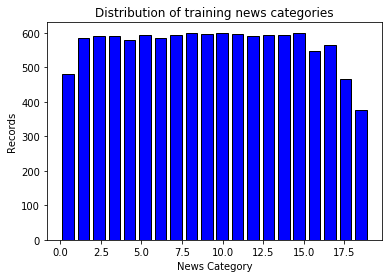

In [12]:
# 训练集新闻纪录类别分布图
plt.hist(newsgroups_train.target, bins=len(newsgroups_train.target_names), 
         facecolor="blue", edgecolor="black", rwidth=0.75)
# 显示横轴标签
plt.xlabel("News Category")
# 显示纵轴标签
plt.ylabel("Records")
# 显示图标题
plt.title("Distribution of training news categories")
plt.show()

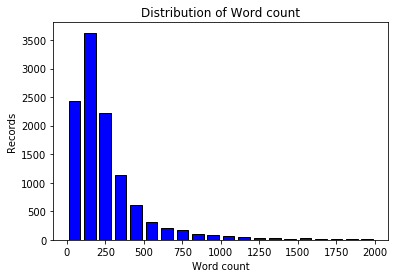

In [13]:
# 新闻的长度分布
plt.hist(word_count.values(), bins=20, 
         facecolor="blue", edgecolor="black", range=(0,2000), rwidth=0.75)
# 显示横轴标签
plt.xlabel("Word count")
# 显示纵轴标签
plt.ylabel("Records")
# 显示图标题
plt.title("Distribution of Word count")
plt.show()

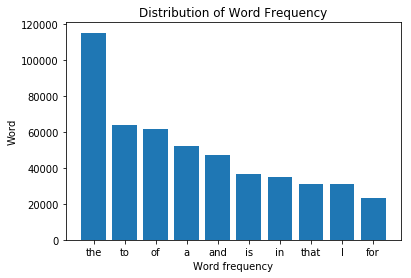

In [14]:
# 词频最高的20个词的分布图
x=[]
y=[]
for item in dictionary_most[:10]:
    x.append(item[0])
    y.append(item[1])
plt.bar(x = x, height= y)
# 显示横轴标签
plt.xlabel("Word frequency")
# 显示纵轴标签
plt.ylabel("Word")
# 显示图标题
plt.title("Distribution of Word Frequency")
plt.show()

# 3.数据预处理

In [15]:
# 定义清理数据函数
import re

def clean_str(string):
    """ 清理数据 """ 
    # 去掉首尾空格并转换为小写
    string = string.strip().lower()
    
    # 去掉标点符号
    string = re.sub(r"'", "", string) 
    string = re.sub(r'"', '', string) 
    string = re.sub(r"\.", "", string) 
    string = re.sub(r",", "", string) 
    string = re.sub(r"\?", "", string) 
    string = re.sub(r"!", "", string) 
    string = re.sub(r":", "", string) 
    string = re.sub(r"\.\.\.", "", string) 
    string = re.sub(r"\(", "", string) 
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\[", "", string) 
    string = re.sub(r"\]", "", string) 
    string = re.sub(r"\{", "", string) 
    string = re.sub(r"\}", "", string) 
    string = re.sub(r"\>", "", string) 
    string = re.sub(r"\<", "", string) 
    string = re.sub(r"|", "", string)
    
    # 去掉不影响分类但词频很高的停用词及其它错误词
    bad_words = ['the', 'to', 'of', 'a', 'and', 'is', 'that', 'for', 'i', 'it', "1",
                'in', "i\'am", 'you', 'be', 'on', 'are', 'with', 'not', 'this',
                'as', 'was', 'or', 'from:', 're:', 'would', 'if', 'your', 'one', 'which']
    for bad_word in bad_words:
        string = re.sub(' '+bad_word+' ', " ", string) 
    
    return string

In [16]:
# 清理数据
train_data = []
test_data = []
for record in newsgroups_train.data:
    record = clean_str(record)
    train_data.append(record)
for record in newsgroups_test.data:
    record = clean_str(record)
    test_data.append(record)

# 4.机器学习算法

In [17]:
# 导入相关的库
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools

In [18]:
# 定义衡量标准
def performance_metric(y_true, y_predict):
    """计算分数"""   
    score = accuracy_score(y_true, y_predict)
    return score

In [19]:
# 定义混淆矩阵方法
def plot_confusion_matrix(classes, y_test, y_pred, 
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)
    
    plt.figure(figsize=(12, 10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png', dpi=100)

In [21]:
# 定义停用词和影响分类的错误词
stop_words = nltk.corpus.stopwords.words('english')
bad_words = ['maxaxaxaxaxaxaxaxaxaxaxaxaxaxax',  '_______',
             '______', '________', '_______________________________________________________________________________', 
             '________________________________________________________________________________','_________','_________', '__________', 
             '________________________________________________________________________',
             '___________', '_____________', '___________________', '_______________________', '_______________________________', 
             '___________________________________', '____________________________________', '______________________________________________',
             '______________________________________________________________',
             '_________________________________________________________________', 
             '____________________________________________________________________', 
             '_____________________________________________________________________',
             '______________________________________________________________________', 
             '__________________________________________________________________________', 
             '____________________________________________________________________________', 
             '_____________________________________________________________________________',
             '______________________________________________________________________________', '______________', '_______________', 
             '_____________________', '______________________________________',
             '_______________________________________', '___________________________________________________________________________',
             '____________', '________________', '_________________', '____________________________', '______________________________', 
             '__________________________________', '________________________________________________',
             '_____________________________________________________', '__________________________________________________________', 
             '____________________________________________________________', 
             '________________________________________________________________', 
             '_______________________________________________________________________',
             '8axaxaxaxax', '8axaxaxaxaxaxax', '8axaxaxaxaxaxaxax', '8axaxaxaxaxaxaxaxaxax', '8axaxaxaxaxaxaxaxaxaxax',
             '8axaxaxaxaxaxaxaxaxaxaxax', '8axaxaxaxaxaxaxaxaxaxaxaxax','axaxax', 'axaxaxax', 'axaxaxaxax', 'axaxaxaxaxax', 
             'axaxaxaxaxaxax', 'axaxaxaxaxaxaxax', 'axaxaxaxaxaxaxaxax',
             'axaxaxaxaxaxaxaxaxax', 'axaxaxaxaxaxaxaxaxaxax', 'axaxaxaxaxaxaxaxaxaxaxax', 'axaxaxaxaxaxaxaxaxaxaxaxaxax',
             'maxaxaxaxaxaxas', 'maxaxaxaxaxaxaxas', 'maxaxaxaxaxaxaxax', 'maxaxaxaxaxaxaxaxax3', 'maxaxaxaxaxaxaxaxaxax', 
             'maxaxaxaxaxaxaxaxaxaxa', 'maxaxaxaxaxaxaxaxaxaxaxas', 'maxaxaxaxaxaxaxaxaxaxaxaxas', 'maxaxaxaxaxaxaxaxaxaxaxaxax', 
             'maxaxaxaxaxaxaxaxaxaxaxaxaxas', 'maxaxaxaxaxaxaxaxaxaxaxaxaxaxas',
             '93104173826u28037', '93104231049u28037', '93107144339saundrsg', '9310913404334aej7d',
             '1993apr120023025262', '1993apr1311531317986', '1993apr1321560526252', '1993apr1412264716364', '1993apr1412275811467', 
             '1993apr1412581321737', '1993apr1417214527458', '1993apr141826102330', '1993apr141844482331', '1993apr1423280618970', 
             '1993apr1501365111353', '1993apr150210217538', '1993apr150242468076', '1993apr1505174629848', '1993apr150553416075', 
             '1993apr15092101', '1993apr150932315148', '1993apr1513594116105', '1993apr151433208618', '1993apr1514484319549', 
             '1993apr1515055015347', '1993apr1516045027799', '1993apr1516494011632', '1993apr151707318797', '1993apr151746576176',
             '1993apr1518445227322', '1993apr151925583314', '1993apr1519360314228', '1993apr1520281129312', '1993apr1520484524939', 
             '1993apr152222241', '1993apr1522565717804', '1993apr152324122261', '1993apr160013213692', '1993apr1601023514225', 
             '1993apr1613003718830', '1993apr161447501568', '1993apr16155123447', '1993apr1615591928040', '1993apr161810409381', 
             '1993apr1619470813273', '1993apr1619545221375', '1993apr1702301717301', '1993apr1718511810792', '1993apr180001522339',
             '1993apr180013192340', '1993apr1809105114496', '1993apr1817253110946', '1993apr1902422211181', '1993apr1913013212650',
             '1993apr191558568260', '1993apr1919375812091', '1993apr192056151013', '1993apr192354306097', '1993apr2000035920098', 
             '1993apr2000041325123', '1993apr200320175783', '1993apr200326233046', '1993apr200505504660', '1993apr201010442291', 
             '1993apr2013180016136', '1993apr2014325512711', '1993apr201505312059', '1993apr2015281928186', '1993apr2016373016128', 
             '1993apr2016451720876', '1993apr2019210511751', '1993apr20211638168730', '1993apr2100123026384', '1993apr2113231816981',
             '1993apr2114182423536', '1993apr2115462016330', '1993apr220928302190', '1993apr242036206531', '1993apr2517100310694', 
             '1993apr308105211292', '1993apr309522024632', '1993apr321191021908', '1993apr505012722304', '1993apr5084042822', 
             '1993apr521145712789',  '2a42dubinskivmscsdmuedu', '2axaxaxaxaxaxaxaxaxaxaxaxaxax','2bce09186105', '2bcf26643c6a', 
             '2bdad77924910']
stop_words.extend(bad_words)

In [22]:
# 向量化
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=2, max_features = 35000)
vectors_train = vectorizer.fit_transform(train_data)
vectors_test = vectorizer.transform(test_data)
word_list = vectorizer.get_feature_names()

## 4.1 朴素贝叶斯算法

In [26]:
# 定义朴素贝叶斯分类方法
def fit_model_MultinomialNB(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的贝叶斯模型"""
    cross_validator = KFold(n_splits=10)
    clf_MultinomialNB = MultinomialNB()
    params = {'alpha':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,1.0]}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator = clf_MultinomialNB, param_grid = params, scoring = scoring_fnc, cv = cross_validator)
    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
    print(grid.best_params_)
    # 返回网格搜索后的最优模型
    return grid.best_estimator_

In [27]:
optimal_reg_MultinomialNB = fit_model_MultinomialNB(vectors_train, newsgroups_train.target)

{'alpha': 0.05}


In [28]:
pred_MultinomialNB = optimal_reg_MultinomialNB.predict(vectors_test)
accuracy_MultinomialNB = performance_metric(newsgroups_test.target, pred_MultinomialNB)
print("朴素贝叶斯正确率：", accuracy_MultinomialNB)

朴素贝叶斯正确率： 0.8526287838555496


[[250   0   0   4   0   1   0   0   2   1   0   1   0   4   3  30   3   4
    1  15]
 [  1 302   8  14  11  21   6   0   1   3   0   9   4   0   5   0   1   1
    1   1]
 [  0  23 275  41   7  16   7   1   1   1   0   4   1   0   5   5   0   0
    4   3]
 [  0  13  19 305  20   2  11   1   0   0   1   0  18   0   2   0   0   0
    0   0]
 [  0   3   7  11 334   1  12   4   0   3   0   1   7   0   2   0   0   0
    0   0]
 [  0  35  12   9   2 326   4   1   0   0   0   0   0   0   4   0   2   0
    0   0]
 [  0   3   4  19  10   0 331  11   3   0   1   0   5   2   1   0   0   0
    0   0]
 [  0   1   1   5   1   0  11 356   9   1   2   0   5   1   1   0   1   0
    1   0]
 [  0   0   0   1   2   0   3   8 380   1   0   0   2   0   0   0   0   0
    1   0]
 [  0   1   0   0   1   0   3   2   1 377  12   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   4 390   1   1   1   0   1   1   0
    0   0]
 [  1   4   1   0   4   1   6   3   0   0   0 369   1   3   0   0

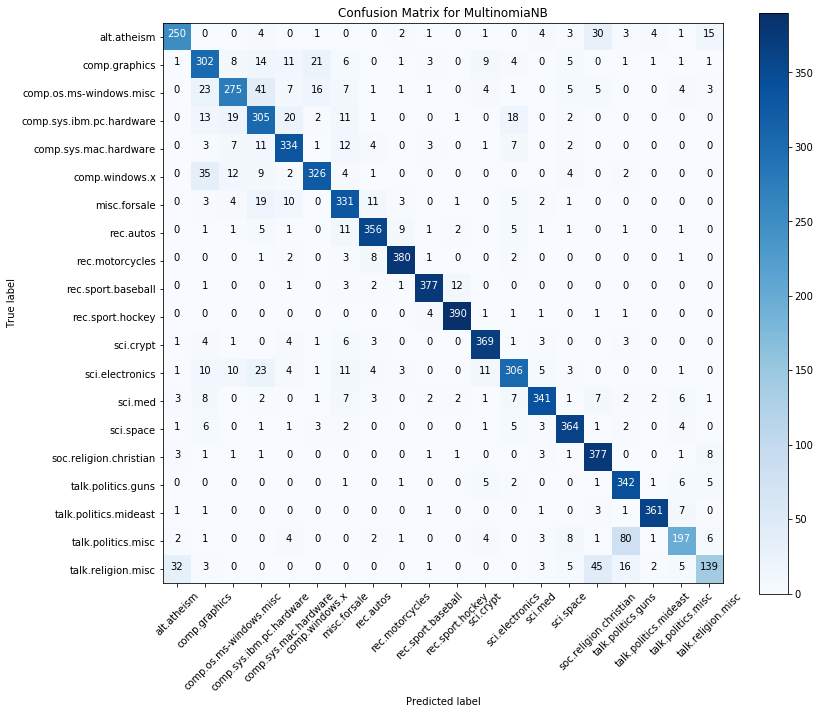

In [29]:
# 打印混淆矩阵
plot_confusion_matrix(classes=newsgroups_test.target_names, 
                      y_test = newsgroups_test.target,
                      y_pred = pred_MultinomialNB,
                      normalize=False,
                      title = 'Confusion Matrix for MultinomiaNB')

## 4.2 SVM算法

In [28]:
# 定义SVM方法
def fit_model_SVC(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的svm模型"""
    cross_validator = KFold(n_splits=10)
    clf_SVC = SVC(random_state=0)
    params = {
            'C': [1, 10],
            'kernel': ['linear']
    }
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator = clf_SVC, param_grid = params, scoring = scoring_fnc, cv = cross_validator)
    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
    print(grid.best_params_)
    # 返回网格搜索后的最优模型
    return grid.best_estimator_

In [29]:
optimal_reg_SVC = fit_model_SVC(vectors_train, newsgroups_train.target)

{'C': 10, 'kernel': 'linear'}


In [30]:
pred_SVC = optimal_reg_SVC.predict(vectors_test)
accuracy_SVC = performance_metric(newsgroups_test.target,  pred_SVC)
print("svm正确率：", accuracy_SVC)

svm正确率： 0.8388210302708444


[[234   2   0   2   0   1   1   0   1   0   0   1   3   8   4  25   0   2
    0  35]
 [  1 316   5  10   9  18   5   1   0   2   1   3  13   0   1   1   0   1
    1   1]
 [  0  30 273  35  14  19   2   1   0   2   0   1   2   3   2   4   0   0
    4   2]
 [  0  14  20 301  18   2  15   1   0   0   0   0  19   2   0   0   0   0
    0   0]
 [  0   7   3  27 319   2  11   0   1   2   0   0  12   0   0   0   0   0
    1   0]
 [  0  37  31  10   2 306   2   1   1   0   0   0   2   1   2   0   0   0
    0   0]
 [  0   1   2  16   9   0 343   4   2   0   2   0   9   2   0   0   0   0
    0   0]
 [  0   3   0   4   0   1  13 353   4   2   0   0  13   1   0   0   0   0
    2   0]
 [  0   1   0   1   0   1   4  13 371   1   0   0   4   2   0   0   0   0
    0   0]
 [  1   1   0   0   1   0   6   3   0 374   6   0   2   2   0   0   0   0
    1   0]
 [  0   1   0   1   0   1   3   0   0   7 380   0   1   0   0   2   1   0
    2   0]
 [  0   4   1   0   5   2   6   2   1   1   0 355  10   3   0   1

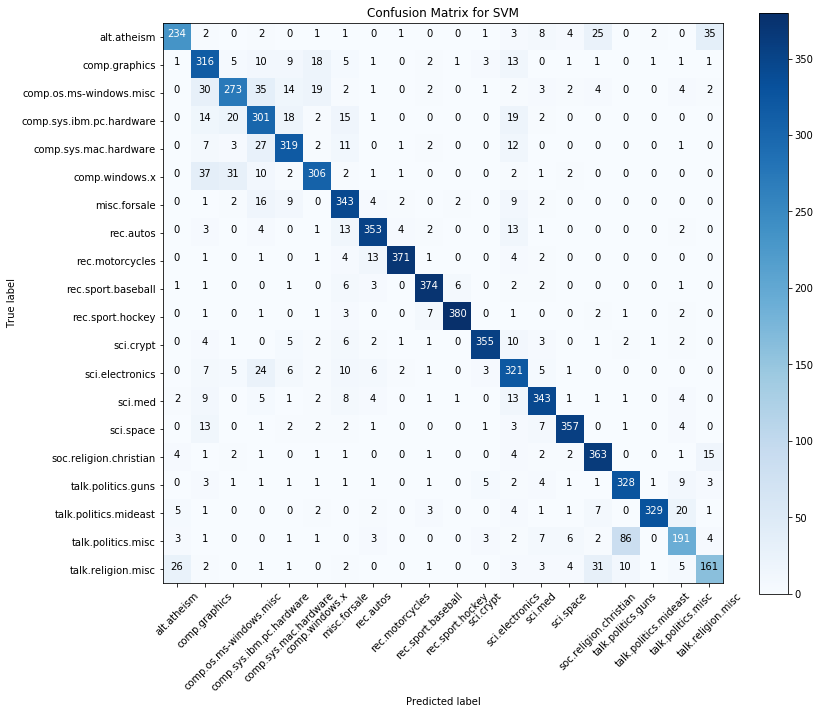

In [31]:
# 打印混淆矩阵
plot_confusion_matrix(classes=newsgroups_test.target_names, 
                      y_test = newsgroups_test.target,
                      y_pred = pred_SVC,
                      normalize=False,
                      title = 'Confusion Matrix for SVM')

# 5.多层感知机

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [34]:
x_train, y_train = vectors_train.todense(), to_categorical(np.array(newsgroups_train.target))
x_test, y_test = vectors_test.todense(), to_categorical(np.array(newsgroups_test.target))

In [35]:
# 定义模型
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(35000,)))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               17920512  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                10260     
Total params: 17,930,772
Trainable params: 17,930,772
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer= 'rmsprop',
              metrics=['accuracy'])

In [37]:
from keras.callbacks import ModelCheckpoint 
from keras.callbacks import EarlyStopping 

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=1, 
    verbose=0, 
    mode='auto'
)
checkpointer = ModelCheckpoint(filepath='weights.best.mlp.hdf5', 
                               verbose=1, save_best_only=True)
batch_size = 128

history = model.fit(x_train, y_train, 
                    validation_split=0.1,
                    batch_size=batch_size,
                    epochs = 20,
                    callbacks=[checkpointer, early_stopping],
                    shuffle=True)

Train on 10182 samples, validate on 1132 samples
Epoch 1/20
10182/10182 [==============================] - 79s 8ms/step - loss: 2.2049 - acc: 0.7616 - val_loss: 1.3827 - val_acc: 0.8746

Epoch 00001: val_loss improved from inf to 1.38268, saving model to weights.best.mlp.hdf5
Epoch 2/20
10182/10182 [==============================] - 5s 444us/step - loss: 0.8071 - acc: 0.9298 - val_loss: 0.6181 - val_acc: 0.9055

Epoch 00002: val_loss improved from 1.38268 to 0.61809, saving model to weights.best.mlp.hdf5
Epoch 3/20
10182/10182 [==============================] - 4s 387us/step - loss: 0.3240 - acc: 0.9575 - val_loss: 0.3919 - val_acc: 0.9240

Epoch 00003: val_loss improved from 0.61809 to 0.39191, saving model to weights.best.mlp.hdf5
Epoch 4/20
10182/10182 [==============================] - 4s 388us/step - loss: 0.1660 - acc: 0.9745 - val_loss: 0.3053 - val_acc: 0.9284

Epoch 00004: val_loss improved from 0.39191 to 0.30533, saving model to weights.best.mlp.hdf5
Epoch 5/20
10182/10182 [

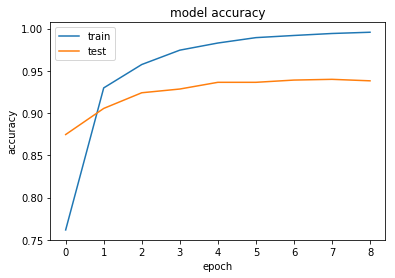

In [38]:
# 显示acc和loss曲线
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

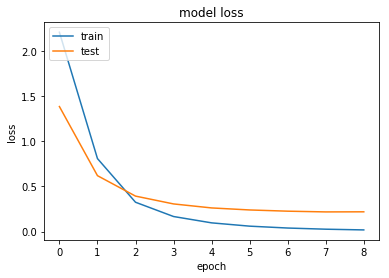

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
scores_mlp = model.evaluate(x_test, y_test)
print('test_loss: %f, accuracy: %f' % (scores_mlp[0], scores_mlp[1]))

7532/7532 [==============================] - 1s 193us/step
test_loss: 0.512297, accuracy: 0.860595


# 6.一维卷积神经网络结合word2vec

In [41]:
# 导入GoogleNews word2vec 词向量
from gensim.models import KeyedVectors
word2vec = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

In [74]:
import collections
word2index = collections.defaultdict(int)
for index, word in enumerate(word_list):
    word2index[word] = index

In [75]:
MAX_SEQUENCE_LENGTH = 750
EMBEDDING_DIM = 300
VOCAB_SIZE = len(word_list)

In [76]:
embedding_weights = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
for word, index in word2index.items():
    try:
        embedding_weights[index, :] = word2vec[word]
    except KeyError:
        pass

In [77]:
# 去掉数据中的停用词和错误词
train_data_updated = []
test_data_updated = []
for record in train_data:
    for bad_word in stop_words:
        record = re.sub(' '+bad_word+' ', " ", record)
    train_data_updated.append(record)
for record in test_data:
    for bad_word in stop_words:
        record = re.sub(' '+bad_word+' ', " ", record)
    test_data_updated.append(record)

In [84]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

def preprocessing(train_texts, train_labels, test_texts, test_labels):
    tokenizer = Tokenizer(num_words = VOCAB_SIZE)
    tokenizer.fit_on_texts(train_texts)
    # 对每一句影评文字转换为数字列表，使用每个词的编号进行编号
    x_train_seq = tokenizer.texts_to_sequences(train_texts)
    x_test_seq = tokenizer.texts_to_sequences(test_texts)
    x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
    x_test = sequence.pad_sequences(x_test_seq, maxlen=MAX_SEQUENCE_LENGTH)
    y_train = to_categorical(np.array(train_labels))
    y_test = to_categorical(np.array(test_labels))
    return x_train, y_train, x_test, y_test

In [85]:
x_train, y_train, x_test, y_test = preprocessing(train_data_updated, newsgroups_train.target, test_data_updated, newsgroups_test.target)

In [86]:
from keras.models import Model
from keras.layers import Dense, Embedding, Flatten, Conv1D, MaxPooling1D, Dropout, Input, concatenate

def text_word2vec_cnn(maxlen=MAX_SEQUENCE_LENGTH, max_features=VOCAB_SIZE, embed_size=EMBEDDING_DIM):
    # Inputs
    comment_seq = Input(shape=[maxlen])

    # Embeddings layers
    emb_comment = Embedding(max_features, embed_size, weights = [embedding_weights])(comment_seq)

    # conv layers
    convs = []
    filter_sizes = [2, 3, 4]
    for fsz in filter_sizes:
        l_conv = Conv1D(filters=100, kernel_size=fsz, activation='relu')(emb_comment)
        l_pool = MaxPooling1D(maxlen - fsz + 1)(l_conv)
        l_pool = Flatten()(l_pool)
        convs.append(l_pool)
    merge = concatenate(convs, axis=1)
    out = Dropout(0.5)(merge)
    output = Dense(32, activation='relu')(out)
    output = Dense(units=20, activation='softmax')(output)
    model = Model([comment_seq], output)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    return model

In [87]:
model = text_word2vec_cnn()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 750)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 750, 300)     10500000    input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 749, 100)     60100       embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 748, 100)     90100       embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_9 (

In [88]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=1, 
    verbose=0, 
    mode='auto'
)
checkpointer = ModelCheckpoint(filepath='weights.best.word2vec_cnn.hdf5', 
                               verbose=1, save_best_only=True)

batch_size = 128
history_word2vec = model.fit(x_train, y_train, 
                             validation_split=0.1,
                             batch_size=batch_size,
                             epochs = 20,
                             callbacks=[checkpointer, early_stopping],
                             shuffle=True)

Train on 10182 samples, validate on 1132 samples
Epoch 1/20
10182/10182 [==============================] - 66s 6ms/step - loss: 2.9602 - acc: 0.0908 - val_loss: 2.7717 - val_acc: 0.2597

Epoch 00001: val_loss improved from inf to 2.77168, saving model to weights.best.word2vec_cnn.hdf5
Epoch 2/20
10182/10182 [==============================] - 20s 2ms/step - loss: 2.4363 - acc: 0.3283 - val_loss: 2.0147 - val_acc: 0.6281

Epoch 00002: val_loss improved from 2.77168 to 2.01471, saving model to weights.best.word2vec_cnn.hdf5
Epoch 3/20
10182/10182 [==============================] - 20s 2ms/step - loss: 1.4137 - acc: 0.6820 - val_loss: 1.0709 - val_acc: 0.7995

Epoch 00003: val_loss improved from 2.01471 to 1.07087, saving model to weights.best.word2vec_cnn.hdf5
Epoch 4/20
10182/10182 [==============================] - 20s 2ms/step - loss: 0.6016 - acc: 0.8865 - val_loss: 0.6576 - val_acc: 0.8613

Epoch 00004: val_loss improved from 1.07087 to 0.65762, saving model to weights.best.word2vec_

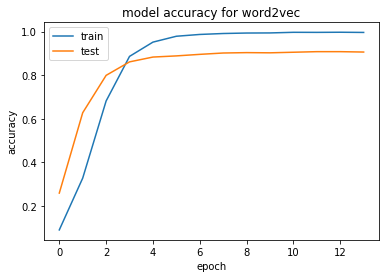

In [89]:
# 显示acc和loss曲线
import matplotlib.pyplot as plt
plt.plot(history_word2vec.history['acc'])
plt.plot(history_word2vec.history['val_acc'])
plt.title('model accuracy for word2vec')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

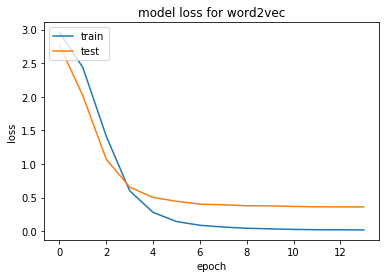

In [90]:
plt.plot(history_word2vec.history['loss'])
plt.plot(history_word2vec.history['val_loss'])
plt.title('model loss for word2vec')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [91]:
scores = model.evaluate(x_test, y_test)
print('test_loss: %f, accuracy: %f' % (scores[0], scores[1]))

7532/7532 [==============================] - 5s 679us/step
test_loss: 0.684453, accuracy: 0.824349
